In [2]:
import pandas as pd
from selenium import webdriver

In [3]:
driver = webdriver.Chrome()

In [52]:
#LeBron's:
# driver.get('http://stats.nba.com/player/2544/')
# RE-DID THIS TO GET TOTALS DATA INSTEAD OF AVERAGES
driver.get('http://stats.nba.com/player/2544/?Season=2017-18&SeasonType=Regular%20Season&PerMode=Totals')

In [53]:
rows = driver.find_elements_by_tag_name('tr')
len(rows)

160

In [19]:
# print(rows[15].text)

# for row in rows[1:16]:
#     print(row.text)

# onerow_cells = rows[1].find_elements_by_tag_name('td')
# print(onerow_cells[25].text)

In [54]:
lebron_stats = []

for row in rows[1:16]:
    cells = row.find_elements_by_tag_name('td')
    year_info = {
        'year': cells[0].text,
        'team': cells[1].text,
        'games_played': cells[2].text,
        'minutes_played': cells[3].text,
        'points': cells[4].text,
        'field_goals_made': cells[5].text,
        'field_goals_attempted': cells[6].text,
        'field_goal_percentage': cells[7].text,
        'three_pointers_made': cells[8].text, 
        'three_pointers_attempted': cells[9].text,
        'three_pointer_percentage': cells[10].text,
        'free_throws_made': cells[11].text,
        'free_throws_attempted': cells[12].text,
        'free_throw_percentage': cells[13].text,
        'offensive_rebounds': cells[14].text,
        'defensive_rebounds': cells[15].text,
        'rebounds': cells[16].text,
        'assists': cells[17].text,
        'turnovers': cells[18].text,
        'steals': cells[19].text,
        'blocks': cells[20].text,
        'personal_fouls': cells[21].text,
        'fantasy_points': cells[22].text,
        'double_doubles': cells[23].text,
        'triple_doubles': cells[24].text,
        '+/-': cells[25].text
    }
    lebron_stats.append(year_info)
        
# MAY HAVE TO DO THE astype float

In [55]:
lebron_stats

[{'year': '2017-18',
  'team': 'CLE',
  'games_played': '82',
  'minutes_played': '3026',
  'points': '2251',
  'field_goals_made': '857',
  'field_goals_attempted': '1580',
  'field_goal_percentage': '54.2',
  'three_pointers_made': '149',
  'three_pointers_attempted': '406',
  'three_pointer_percentage': '36.7',
  'free_throws_made': '388',
  'free_throws_attempted': '531',
  'free_throw_percentage': '73.1',
  'offensive_rebounds': '97',
  'defensive_rebounds': '612',
  'rebounds': '709',
  'assists': '747',
  'turnovers': '347',
  'steals': '116',
  'blocks': '71',
  'personal_fouls': '136',
  'fantasy_points': '4436.3',
  'double_doubles': '52',
  'triple_doubles': '18',
  '+/-': '104'},
 {'year': '2016-17',
  'team': 'CLE',
  'games_played': '74',
  'minutes_played': '2794',
  'points': '1954',
  'field_goals_made': '736',
  'field_goals_attempted': '1344',
  'field_goal_percentage': '54.8',
  'three_pointers_made': '124',
  'three_pointers_attempted': '342',
  'three_pointer_perc

In [56]:
lebron_df = pd.DataFrame(lebron_stats)
lebron_df.head()

,+/-,assists,blocks,defensive_rebounds,double_doubles,fantasy_points,field_goal_percentage,field_goals_attempted,field_goals_made,free_throw_percentage,...,points,rebounds,steals,team,three_pointer_percentage,three_pointers_attempted,three_pointers_made,triple_doubles,turnovers,year
0,104,747,71,612,52,4436.3,54.2,1580,857,73.1,...,2251,709,116,CLE,36.7,406,149,18,347,2017-18
1,483,646,44,542,42,3794.8,54.8,1344,736,67.4,...,1954,639,92,CLE,36.3,342,124,13,303,2016-17
2,618,514,49,454,28,3579.0,52.0,1416,737,73.1,...,1920,565,104,CLE,30.9,282,87,3,249,2015-16
3,539,511,49,365,22,3210.7,48.8,1279,624,71.0,...,1743,416,109,CLE,35.4,339,120,2,272,2014-15
4,410,488,26,452,12,3631.6,56.7,1353,767,75.0,...,2089,533,121,MIA,37.9,306,116,1,270,2013-14


In [57]:
cols = ['year', 'team', 'games_played', 'minutes_played', 'points', 'field_goals_made', 'field_goals_attempted', 'field_goal_percentage', 'three_pointers_made', 'three_pointers_attempted', 'three_pointer_percentage', 'free_throws_made', 'free_throws_attempted', 'free_throw_percentage', 'offensive_rebounds', 'defensive_rebounds', 'rebounds', 'assists', 'turnovers', 'steals', 'blocks', 'personal_fouls', 'fantasy_points', 'double_doubles', 'triple_doubles', '+/-']
lebron_df = lebron_df[cols]
lebron_df.tail()

,year,team,games_played,minutes_played,points,field_goals_made,field_goals_attempted,field_goal_percentage,three_pointers_made,three_pointers_attempted,...,rebounds,assists,turnovers,steals,blocks,personal_fouls,fantasy_points,double_doubles,triple_doubles,+/-
10,2007-08,CLE,75,3027,2250,794,1642,48.4,113,359,...,592,539,255,138,81,165,4170.9,31,7,139
11,2006-07,CLE,78,3190,2132,772,1621,47.6,99,310,...,526,470,250,125,55,171,3758.2,16,1,377
12,2005-06,CLE,79,3361,2478,875,1823,48.0,127,379,...,556,521,260,123,66,181,4233.7,21,5,275
13,2004-05,CLE,80,3384,2175,795,1684,47.2,108,308,...,588,577,262,177,52,146,4171.1,25,4,152
14,2003-04,CLE,79,3127,1654,622,1492,41.7,63,217,...,432,465,273,130,58,149,3160.9,12,0,-144


In [58]:
lebron_df.dtypes

year                        object
team                        object
games_played                object
minutes_played              object
points                      object
field_goals_made            object
field_goals_attempted       object
field_goal_percentage       object
three_pointers_made         object
three_pointers_attempted    object
three_pointer_percentage    object
free_throws_made            object
free_throws_attempted       object
free_throw_percentage       object
offensive_rebounds          object
defensive_rebounds          object
rebounds                    object
assists                     object
turnovers                   object
steals                      object
blocks                      object
personal_fouls              object
fantasy_points              object
double_doubles              object
triple_doubles              object
+/-                         object
dtype: object

In [59]:
lebron_df.to_csv('lebron.csv', index=False)

In [3]:
# HAVE TO CONVERT YEAR TO DATETIME**********
lebron = pd.read_csv('lebron.csv')
lebron.dtypes

year                         object
team                         object
games_played                  int64
minutes_played                int64
points                        int64
field_goals_made              int64
field_goals_attempted         int64
field_goal_percentage       float64
three_pointers_made           int64
three_pointers_attempted      int64
three_pointer_percentage    float64
free_throws_made              int64
free_throws_attempted         int64
free_throw_percentage       float64
offensive_rebounds            int64
defensive_rebounds            int64
rebounds                      int64
assists                       int64
turnovers                     int64
steals                        int64
blocks                        int64
personal_fouls                int64
fantasy_points              float64
double_doubles                int64
triple_doubles                int64
+/-                           int64
dtype: object

In [35]:
# THIS IS PRACTICE BITS I DID TO DOUBLE-CHECK MY ALGORITHMS FORMULA TO GET A CORRECT AVG OF AVGS
# THIS PROVED UNNECESSARY AFTER I REALIZED I COULD SCRAPE PLAYER DATA WITH YEARLY TOTALS RATHER THAN AVGS
season_1 = [20, 33, 32, 29, 40]
season_2 = [44, 28, 31, 38, 39]

In [37]:
season_1_avg = sum(season_1) / len(season_1)
season_1_avg

30.8

In [41]:
season_2_avg = sum(season_2) / len(season_2)
season_2_avg

36.0

In [42]:
bad_avg = (season_2_avg + season_1_avg) / 2
bad_avg

33.4

In [43]:
good_avg = (sum(season_1) + sum(season_2)) / 10
good_avg

33.4

In [49]:
better_avg = (season_1_avg * len(season_1) + season_2_avg * len(season_2)) / 10
better_avg

33.4

# So for me to get true averages, it will be:
true_avg_pts = (sum(lebron['points'][i] * lebron['games_played'][i])) / sum(lebron['games_played'][entire column])

In [61]:
# MJ's:
driver.get('http://stats.nba.com/player/893/career/?PerMode=Totals')

In [62]:
rows = driver.find_elements_by_tag_name('tr')
len(rows)

138

In [74]:
# print(rows[15].text)

# for row in rows[1:16]:
#     print(row.text)

# onerow_cells = rows[1].find_elements_by_tag_name('td')
# print(onerow_cells[25].text)

In [75]:
# SEASON TEAM AGE GP GS MIN PTS FGM FGA FG% 3PM 3PA 3P% FTM FTA FT% OREB DREB REB
# AST STL BLK TOV PF

mj_stats = []

for row in rows[1:16]:
    cells = row.find_elements_by_tag_name('td')
    year_info = {
        'year': cells[0].text,
        'team': cells[1].text,
        'age': cells[2].text,
        'games_played': cells[3].text,
        'games_started': cells[4].text,
        'minutes_played': cells[5].text,
        'points': cells[6].text,
        'field_goals_made': cells[7].text,
        'field_goals_attempted': cells[8].text,
        'field_goal_percentage': cells[9].text,
        'three_pointers_made': cells[10].text, 
        'three_pointers_attempted': cells[11].text,
        'three_pointer_percentage': cells[12].text,
        'free_throws_made': cells[13].text,
        'free_throws_attempted': cells[14].text,
        'free_throw_percentage': cells[15].text,
        'offensive_rebounds': cells[16].text,
        'defensive_rebounds': cells[17].text,
        'rebounds': cells[18].text,
        'assists': cells[19].text,
        'steals': cells[20].text,
        'blocks': cells[21].text,
        'turnovers': cells[22].text,
        'personal_fouls': cells[23].text,
    }
    mj_stats.append(year_info)

In [76]:
mj_stats

[{'year': '2002-03',
  'team': 'WAS',
  'age': '40',
  'games_played': '82',
  'games_started': '67',
  'minutes_played': '3029',
  'points': '1640',
  'field_goals_made': '679',
  'field_goals_attempted': '1527',
  'field_goal_percentage': '44.5',
  'three_pointers_made': '16',
  'three_pointers_attempted': '55',
  'three_pointer_percentage': '29.1',
  'free_throws_made': '266',
  'free_throws_attempted': '324',
  'free_throw_percentage': '82.1',
  'offensive_rebounds': '71',
  'defensive_rebounds': '426',
  'rebounds': '497',
  'assists': '311',
  'steals': '123',
  'blocks': '39',
  'turnovers': '173',
  'personal_fouls': '171'},
 {'year': '2001-02',
  'team': 'WAS',
  'age': '39',
  'games_played': '60',
  'games_started': '53',
  'minutes_played': '2089',
  'points': '1375',
  'field_goals_made': '551',
  'field_goals_attempted': '1324',
  'field_goal_percentage': '41.6',
  'three_pointers_made': '10',
  'three_pointers_attempted': '53',
  'three_pointer_percentage': '18.9',
  'fr

In [77]:
mj = pd.DataFrame(mj_stats)
mj.head()

,age,assists,blocks,defensive_rebounds,field_goal_percentage,field_goals_attempted,field_goals_made,free_throw_percentage,free_throws_attempted,free_throws_made,...,personal_fouls,points,rebounds,steals,team,three_pointer_percentage,three_pointers_attempted,three_pointers_made,turnovers,year
0,40,311,39,426,44.5,1527,679,82.1,324,266,...,171,1640,497,123,WAS,29.1,55,16,173,2002-03
1,39,310,26,289,41.6,1324,551,79.0,333,263,...,119,1375,339,85,WAS,18.9,53,10,162,2001-02
2,35,283,45,345,46.5,1893,881,78.4,721,565,...,151,2357,475,141,CHI,23.8,126,30,185,1997-98
3,34,352,44,369,48.6,1892,920,83.3,576,480,...,156,2431,482,140,CHI,37.4,297,111,166,1996-97
4,33,352,42,395,49.5,1850,916,83.4,657,548,...,195,2491,543,180,CHI,42.7,260,111,197,1995-96


In [78]:
cols = ['year', 'team', 'age', 'games_played', 'games_started', 'minutes_played', 'points', 'field_goals_made', 'field_goals_attempted', 'field_goal_percentage', 'three_pointers_made', 'three_pointers_attempted', 'three_pointer_percentage', 'free_throws_made', 'free_throws_attempted', 'free_throw_percentage', 'offensive_rebounds', 'defensive_rebounds', 'rebounds', 'assists', 'steals', 'blocks', 'turnovers', 'personal_fouls']
mj = mj[cols]
mj.tail()

,year,team,age,games_played,games_started,minutes_played,points,field_goals_made,field_goals_attempted,field_goal_percentage,...,free_throws_attempted,free_throw_percentage,offensive_rebounds,defensive_rebounds,rebounds,assists,steals,blocks,turnovers,personal_fouls
10,1988-89,CHI,26,81,81,3255,2633,966,1795,53.8,...,793,85.0,149,503,652,650,234,65,290,247
11,1987-88,CHI,25,82,82,3311,2868,1069,1998,53.5,...,860,84.1,139,310,449,485,259,131,252,270
12,1986-87,CHI,24,82,82,3281,3041,1098,2279,48.2,...,972,85.7,166,264,430,377,236,125,272,237
13,1985-86,CHI,23,18,7,451,408,150,328,45.7,...,125,84.0,23,41,64,53,37,21,45,46
14,1984-85,CHI,22,82,82,3144,2313,837,1625,51.5,...,746,84.5,167,367,534,481,196,69,291,285


In [79]:
mj.to_csv("mj.csv", index=False)

In [1]:
mj = pd.read_csv("mj.csv")
mj

NameError: name 'pd' is not defined

In [7]:
mj_return = mj.iloc[2:5, :]
mj_return

,year,team,age,games_played,games_started,minutes_played,points,field_goals_made,field_goals_attempted,field_goal_percentage,...,free_throws_attempted,free_throw_percentage,offensive_rebounds,defensive_rebounds,rebounds,assists,steals,blocks,turnovers,personal_fouls
2,1997-98,CHI,35,82,82,3181,2357,881,1893,46.5,...,721,78.4,130,345,475,283,141,45,185,151
3,1996-97,CHI,34,82,82,3109,2431,920,1892,48.6,...,576,83.3,113,369,482,352,140,44,166,156
4,1995-96,CHI,33,82,82,3090,2491,916,1850,49.5,...,657,83.4,148,395,543,352,180,42,197,195


In [8]:
mj_return['championship'] = ['yes', 'yes', 'yes']
mj_return

/Users/matthewrehbein/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,year,team,age,games_played,games_started,minutes_played,points,field_goals_made,field_goals_attempted,field_goal_percentage,...,free_throw_percentage,offensive_rebounds,defensive_rebounds,rebounds,assists,steals,blocks,turnovers,personal_fouls,championship
2,1997-98,CHI,35,82,82,3181,2357,881,1893,46.5,...,78.4,130,345,475,283,141,45,185,151,yes
3,1996-97,CHI,34,82,82,3109,2431,920,1892,48.6,...,83.3,113,369,482,352,140,44,166,156,yes
4,1995-96,CHI,33,82,82,3090,2491,916,1850,49.5,...,83.4,148,395,543,352,180,42,197,195,yes


In [9]:
import matplotlib.pyplot as plt
from cycler import cycler

%matplotlib inline

In [10]:
plt.rcdefaults()
plt.rcParams.update({
  'patch.linewidth': 0.5,
  'patch.facecolor': '#e37e00',
  'patch.edgecolor': '#EEEEEE',
  'patch.antialiased': True,
  'font.size': 10.0,
  'font.family': 'Khmer Sangam MN',
  'axes.facecolor': 'white',
  'axes.edgecolor': 'white',
  'axes.linewidth': '1',
  'axes.grid': True,
  'grid.linewidth': '1',
  'legend.scatterpoints': '2',
  'axes.titlesize': 'large',
  'axes.labelsize': 'large',
  'axes.labelcolor': '#555555',
  'axes.axisbelow': True,
  'axes.prop_cycle': cycler('color', ['#C10534', '#ffd200', '#e37e00', '#00887d', '#7ad2f6', '#014d64']),
  'xtick.major.bottom': True,
  'xtick.minor.bottom': True,
  'xtick.major.size': 7,
  'xtick.major.pad': 2,
  'xtick.direction': 'in',
  'xtick.labelsize': 'medium',
  'ytick.left': True,
  'ytick.labelsize': 'large',
  'grid.color': '#d9e6eb',
  'grid.linestyle': '-',
  'figure.facecolor': 'white'
})

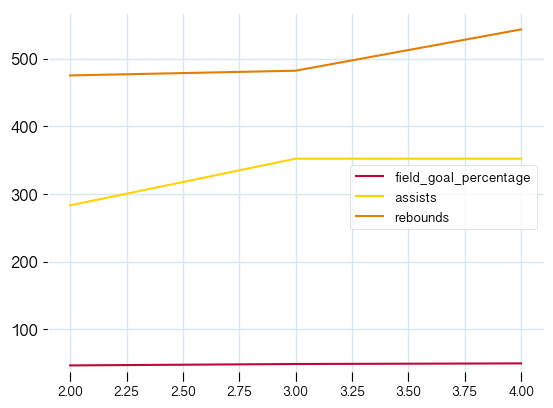

In [18]:
# ax = df.plot(kind='bar', x='Total_Population', y='gdp', s=30, figsize=(12,5))
mj_key_stats = mj_return[['field_goal_percentage', 'assists', 'rebounds']].plot()
# mj_key_stats
plt.show()